c:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


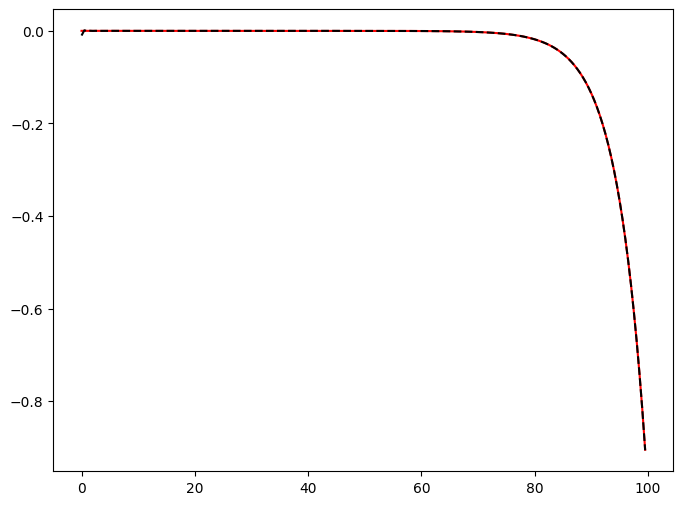

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def matsubara_ifft(G_omega, beta, tau, Momega):

    """
    Fast inverse Fourier transform. Computes the function in imaginary 
    time axis. It's assumed that both time and frequency axis have the
    same length.

    Input:
        G_omega: Function in Matsubara axis
        beta: Inverse temperature of the system
        tau: Imaginary time grid
        Momega: Matsubara frequencies grid


    Output:
        G_loc: Local Green's function in Matsubara axis

    """

    
    N = len(Momega)
    freq = np.pi/beta *( np.array(-2*N*np.fft.fftfreq(N),dtype=float) +1.)
    k = np.arange(N,dtype='float')
    ifft = -1/2+N/beta*np.exp(-1j*np.pi*k/N)*np.fft.ifft(G_omega-1./(1j*freq) )
    
    return ifft

beta = 100
n_omega=200
Momega = (2*np.arange(n_omega) + 1)*np.pi/beta
freq = np.pi/beta *( np.array(-2*n_omega*np.fft.fftfreq(n_omega),dtype=float) +1.)
tau = np.linspace(0, beta*(1. - 1./n_omega), n_omega)

a=0.2
G_omega_exact = 1. / ( 1j*freq + a )
G_tau_exact = -np.exp(a*tau)/(np.exp(a*beta)+1)

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
ax.plot(tau, G_tau_exact, 'r-')
ax.plot(tau, matsubara_ifft(G_omega_exact, beta, tau, Momega), 'k--')

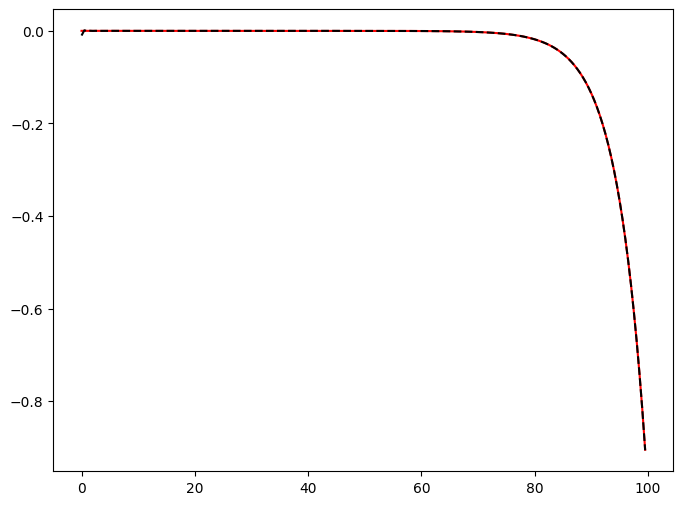

In [2]:
def matsubara_freq(N):
    global beta
    return np.pi/beta *( np.array(-2*N*np.fft.fftfreq(N),dtype=float) +1.)

def matsubara_ifft(G_omega):
    global beta
    N = G_omega.shape[0]
    freq = matsubara_freq(N)
    k = np.arange(N,dtype='float')
    return -1/2+N/beta*np.exp(-1j*np.pi*k/N)*np.fft.ifft(G_omega-1./(1j*freq) )

N=200
beta = 100 
freq = matsubara_freq(N)
G_tau_improved = matsubara_ifft(G_omega_exact)

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
ax.plot(tau, G_tau_exact, 'r-')
ax.plot(tau, G_tau_improved, 'k--')